# Colorizer

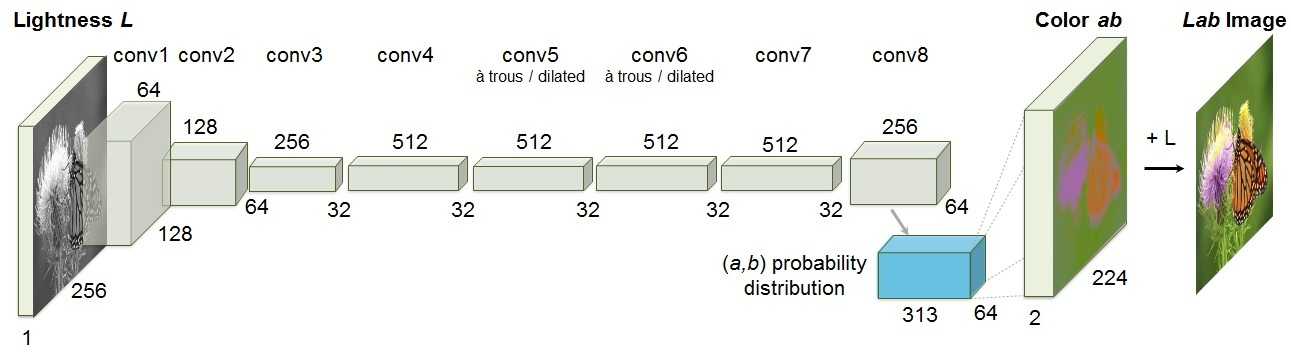

In [1]:
import os
import requests
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

2024-04-21 16:56:03.283970: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 16:56:03.468219: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 16:56:04.526902: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/riccardo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Models

In [2]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [3]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [4]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=2, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [5]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [6]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [7]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [8]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=2, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [9]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(313, kernel_size=13, strides=1, padding="valid", use_bias=True),
    tf.keras.layers.BatchNormalization()
])

In [10]:
# TODO: normalize (in_l-self.l_cent)/self.l_norm

model = tf.keras.Sequential([
    model1,
    model2,
    model3,
    model4,
    model5,
    model6,
    model7,
    model8,
    tf.keras.layers.Softmax(),
    tf.keras.layers.Conv2D(2, kernel_size=1, strides=1, padding="valid", use_bias=False, dilation_rate=1, activation="relu"),
    tf.keras.layers.UpSampling2D(4, interpolation="bilinear")
])

## Dataset

In [44]:
ds = tfds.load('imagenet_v2', shuffle_files=True)

In [45]:
def resize_with_crop(image):
    i = image['image']
    i = tf.cast(i, tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 256, 256)
    i = tf.image.rgb_to_grayscale(i)
    return i

In [46]:
ds = ds['test'].map(resize_with_crop)

## Train

In [51]:
model.evaluate(ds)

ValueError: You must call `compile()` before using the model.